# Unsupervised Learning - Project
Data Description:
The data contains features extracted from the silhouette of vehicles in different
angles. Four "Corgie" model vehicles were used for the experiment: a double
decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This
particular combination of vehicles was chosen with the expectation that the
bus, van and either one of the cars would be readily distinguishable, but it
would be more difficult to distinguish between the cars.

Domain:
Object recognition

Context:
The purpose is to classify a given silhouette as one of three types of vehicle,
using a set of features extracted from the silhouette. The vehicle may be viewed
from one of many different angles.

Attribute Information:
● All the features are geometric features extracted from the silhouette.
● All are numeric in nature.

Learning Outcomes:
● Exploratory Data Analysis
● Reduce number dimensions in the dataset with minimal information loss
● Train a model using Principle Components


Objective:
Apply dimensionality reduction technique – PCA and train a model using
principle components instead of training the model using just the raw data

Dataset:

This dataset comes from the Turing Institute, Glasgow, Scotland. If you use this dataset in any publication you must acknowledge this source.

Solution by: Kartik Thakkar

## 1. Let's import the required libraries and load the data set.

In [249]:
import numpy as np   
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [250]:
#Load and review the data
inpdf=pd.read_csv('vehicle.csv')
inpdf.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [251]:
inpdf.shape

(846, 19)

In [252]:
inpdf.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

### Attribute Information:

COMPACTNESS (average perim)**2/area

CIRCULARITY (average radius)**2/area

DISTANCE CIRCULARITY area/(av.distance from border)**2

RADIUS RATIO (max.rad-min.rad)/av.radius

PR.AXIS ASPECT RATIO (minor axis)/(major axis)

MAX.LENGTH ASPECT RATIO (length perp. max length)/(max length)

SCATTER RATIO (inertia about minor axis)/(inertia about major axis)

ELONGATEDNESS area/(shrink width)**2

PR.AXIS RECTANGULARITY area/(pr.axis length*pr.axis width)

MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this)

SCALED VARIANCE (2nd order moment about minor axis)/area ALONG MAJOR AXIS

SCALED VARIANCE 1 (2nd order moment about major axis)/area ALONG MINOR AXIS

SCALED RADIUS OF GYRATION (mavar+mivar)/area

SKEWNESS ABOUT (3rd order moment about major axis)/sigma_min**3 MAJOR AXIS

SKEWNESS ABOUT 1 (3rd order moment about minor axis)/sigma_maj**3 MINOR AXIS

HOLLOWS RATIO (area of hollows)/(area of bounding polygon)

Where area of hollows= area of bounding poly-area of object. The area of the bounding polygon is found as a side result of the computation to find the maximum length. Each individual length computation yields a pair of calipers to the object orientated at every 5 degrees. The object is propagated into an image containing the union of these calipers to obtain an image of the bounding polygon.

Attribution information from http://archive.ics.uci.edu/ml/datasets/statlog+(vehicle+silhouettes)

In [253]:
inpdf.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [254]:
inpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [255]:
# Lets' see the distribution of vehicle in each class
inpdf['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [256]:
#Converting target column class as category
inpdf['class']=inpdf['class'].astype('category')
inpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   compactness                  846 non-null    int64   
 1   circularity                  841 non-null    float64 
 2   distance_circularity         842 non-null    float64 
 3   radius_ratio                 840 non-null    float64 
 4   pr.axis_aspect_ratio         844 non-null    float64 
 5   max.length_aspect_ratio      846 non-null    int64   
 6   scatter_ratio                845 non-null    float64 
 7   elongatedness                845 non-null    float64 
 8   pr.axis_rectangularity       843 non-null    float64 
 9   max.length_rectangularity    846 non-null    int64   
 10  scaled_variance              843 non-null    float64 
 11  scaled_variance.1            844 non-null    float64 
 12  scaled_radius_of_gyration    844 non-null    float64 
 13  scale

#### Finding: There are null values in the data. Since the focus is on PCA and SVM, it is improtant that the null values are addressed.

In [257]:
#Let's identify all columns having missing values
missing_values_cols=inpdf.columns[inpdf.isnull().any()]
# Number of missing values in each column
inpdf[missing_values_cols].isnull().sum()

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

In [258]:
#Let's manage the missing values in each feature

# 1. Circularity - List all rows with missing value for this feature

missing_circ=inpdf[inpdf['circularity'].isnull()][missing_values_cols]
missing_circ.head(5)

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
5            NaN                 106.0         172.0                  50.0   
105          NaN                 103.0         202.0                  64.0   
118          NaN                   NaN         128.0                  56.0   
266          NaN                  65.0         116.0                  53.0   
396          NaN                 106.0         177.0                  51.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
5            255.0           26.0                    28.0            280.0   
105          220.0           30.0                    25.0              NaN   
118          150.0           46.0                    19.0            168.0   
266          152.0           45.0                    19.0            175.0   
396          256.0           26.0                    28.0            285.0   

     scaled_variance.1  scaled_radius_of_gyration  \
5                957.0                      264.0   
105              711.0                      214.0   
118              324.0                      173.0   
266              335.0                        NaN   
396              966.0                      261.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
5                           85.0             5.0               9.0   
105                         73.0            11.0               NaN   
118                         82.0             9.0              14.0   
266                         85.0             5.0               4.0   
396                         87.0            11.0               2.0   

     skewness_about.2  
5               181.0  
105             188.0  
118             180.0  
266             179.0  
396             182.0

In [259]:
#2 off the 5 rows are such where only value of circularity is missing.
#3 off the 5 rows are such where other values are also missing. We drop these rows.
#Let's identify the class of each vehicle for who the value is missing. This will help us replace the values with the medians of each class.
inpdf.loc[5].loc['class'], inpdf.loc[396].loc['class']

('bus', 'bus')

In [260]:
# Belong to Bus and Car Class
median_circularity_bus=inpdf['circularity'][inpdf['class']=='bus'].median()
median_circularity_bus

44.0

In [261]:
inpdf.drop([105,118,266], inplace=True)
inpdf['circularity'].fillna(median_circularity_bus, inplace=True)

In [262]:
# Let's verify
inpdf[missing_values_cols].isnull().sum()

circularity                    0
distance_circularity           3
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                2
scaled_variance.1              2
scaled_radius_of_gyration      1
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               0
skewness_about.2               1
dtype: int64

In [263]:
#Let's proceed to distance_circularity
inpdf[inpdf['distance_circularity'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
35          46.0                   NaN         172.0                  67.0   
207         42.0                   NaN         121.0                  55.0   
319         51.0                   NaN         194.0                  60.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
35           157.0           43.0                    20.0            170.0   
207          149.0           46.0                    19.0            167.0   
319          220.0           30.0                    25.0            247.0   

     scaled_variance.1  scaled_radius_of_gyration  \
35               363.0                      184.0   
207              323.0                        NaN   
319              731.0                      209.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
35                          67.0            17.0               7.0   
207                         85.0             1.0               6.0   
319                         80.0             7.0               7.0   

     skewness_about.2  
35              192.0  
207             179.0  
319             188.0

In [264]:
#2 off the 3 rows do not have any other feature value missing
#Index 207 has 1 additional feature value missing. Hence we will drop it and replace the values of the 2 other rows with the median of each of their class value.

inpdf.drop(207, inplace=True)

In [265]:
inpdf.loc[35].loc['class'], inpdf.loc[319].loc['class']

('van', 'bus')

In [266]:
median_distance_circularity_van=inpdf['distance_circularity'][inpdf['class']=='van'].median()
median_distance_circularity_bus=inpdf['distance_circularity'][inpdf['class']=='bus'].median()
median_distance_circularity_van,median_distance_circularity_bus

(75.0, 72.5)

In [267]:
inpdf.loc[35]=inpdf.loc[35].replace(np.nan,median_distance_circularity_van)
inpdf.loc[319]=inpdf.loc[319].replace(np.nan,median_distance_circularity_bus)

In [268]:
# Let's verify
inpdf[missing_values_cols].isnull().sum()

circularity                    0
distance_circularity           0
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                2
scaled_variance.1              2
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               0
skewness_about.2               1
dtype: int64

In [269]:
#We repeat the steps for all cloumns with missing values from radius_ratio through skewness_about.2
inpdf[inpdf['radius_ratio'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
9           44.0                  98.0           NaN                  62.0   
78          52.0                  94.0           NaN                  66.0   
159         45.0                  75.0           NaN                  57.0   
287         43.0                  84.0           NaN                  55.0   
345         54.0                 106.0           NaN                  57.0   
467         54.0                 104.0           NaN                  58.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
9            183.0           36.0                    22.0            202.0   
78           208.0           31.0                    24.0            227.0   
159          150.0           44.0                    19.0            170.0   
287          154.0           44.0                    19.0            174.0   
345          236.0           28.0                    26.0            256.0   
467          215.0           31.0                    24.0            221.0   

     scaled_variance.1  scaled_radius_of_gyration  \
9                505.0                      152.0   
78               666.0                      218.0   
159              335.0                      180.0   
287              350.0                      164.0   
345              833.0                      253.0   
467              682.0                      222.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
9                           64.0             4.0              14.0   
78                          76.0            11.0               4.0   
159                         66.0            16.0               2.0   
287                         73.0             6.0               2.0   
345                         81.0             6.0              14.0   
467                         75.0            13.0              23.0   

     skewness_about.2  
9               195.0  
78              193.0  
159             193.0  
287             185.0  
345             185.0  
467             186.0

In [270]:
inpdf.loc[[9,78,159,287,345,467]]['class']

9      car
78     bus
159    car
287    van
345    bus
467    car
Name: class, dtype: category
Categories (3, object): [bus, car, van]

In [271]:
# Lets find median value for car, bus,van
median_rr_van=inpdf['radius_ratio'][inpdf['class']=='van'].median()
median_rr_bus=inpdf['radius_ratio'][inpdf['class']=='bus'].median()
median_rr_car=inpdf['radius_ratio'][inpdf['class']=='car'].median()
median_rr_van,median_rr_bus,median_rr_car

(144.0, 169.0, 186.0)

In [272]:
inpdf.loc[[9,159,467]]=inpdf.loc[[9,159,467]].replace(np.nan,median_rr_car)
inpdf.loc[[78,345]]=inpdf.loc[[78,345]].replace(np.nan,median_rr_bus)
inpdf.loc[[287]]=inpdf.loc[[287]].replace(np.nan,median_rr_van)

In [273]:
# Let's verify
inpdf[missing_values_cols].isnull().sum()

circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                2
scaled_variance.1              2
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               0
skewness_about.2               1
dtype: int64

In [274]:
inpdf[inpdf['pr.axis_aspect_ratio'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
19          56.0                 100.0         215.0                   NaN   
222         50.0                  81.0         197.0                   NaN   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
19           208.0           32.0                    24.0            227.0   
222          186.0           34.0                    22.0            206.0   

     scaled_variance.1  scaled_radius_of_gyration  \
19               651.0                      223.0   
222              531.0                      198.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
19                          74.0             6.0               5.0   
222                         74.0             NaN               1.0   

     skewness_about.2  
19              186.0  
222             197.0

In [275]:
inpdf.drop(222, inplace=True)
inpdf.loc[[19]]['class']

19    car
Name: class, dtype: category
Categories (3, object): [bus, car, van]

In [276]:
# Lets find median value for car, bus,van
median_aar_car=inpdf['pr.axis_aspect_ratio'][inpdf['class']=='car'].median()
median_aar_car

61.0

In [277]:
inpdf.loc[[19]]=inpdf.loc[[19]].replace(np.nan,median_aar_car)

In [278]:
inpdf[missing_values_cols].isnull().sum()

circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                2
scaled_variance.1              2
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    4
skewness_about                 5
skewness_about.1               0
skewness_about.2               1
dtype: int64

In [279]:
inpdf[inpdf['scatter_ratio'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
249         34.0                  53.0         127.0                  58.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
249            NaN           58.0                    17.0            137.0   

     scaled_variance.1  scaled_radius_of_gyration  \
249              197.0                      127.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
249                         70.0             NaN              20.0   

     skewness_about.2  
249             185.0

In [280]:
col_indx=inpdf[inpdf['scatter_ratio'].isnull()][missing_values_cols].index
inpdf.loc[col_indx]['class']

249    car
Name: class, dtype: category
Categories (3, object): [bus, car, van]

In [281]:
median_sr_car=inpdf['scatter_ratio'][inpdf['class']=='car'].median()
median_sr_car

185.0

In [282]:
inpdf.loc[col_indx]=inpdf.loc[col_indx].replace(np.nan,median_sr_car)

In [283]:
inpdf[missing_values_cols].isnull().sum()

circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
scatter_ratio                  0
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                2
scaled_variance.1              2
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    4
skewness_about                 4
skewness_about.1               0
skewness_about.2               1
dtype: int64

In [284]:
inpdf[inpdf['elongatedness'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
215         39.0                  86.0         169.0                  62.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
215          162.0            NaN                    20.0            194.0   

     scaled_variance.1  scaled_radius_of_gyration  \
215              388.0                      147.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
215                         74.0             1.0              22.0   

     skewness_about.2  
215             185.0

In [285]:
col_indx=inpdf[inpdf['elongatedness'].isnull()][missing_values_cols].index
inpdf.loc[col_indx]['class']

215    car
Name: class, dtype: category
Categories (3, object): [bus, car, van]

In [286]:
median_attr_car=inpdf['elongatedness'][inpdf['class']=='car'].median()
median_attr_car

36.0

In [287]:
inpdf.loc[col_indx]=inpdf.loc[col_indx].replace(np.nan,median_attr_car)

In [288]:
inpdf[missing_values_cols].isnull().sum()

circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         3
scaled_variance                2
scaled_variance.1              2
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    4
skewness_about                 4
skewness_about.1               0
skewness_about.2               1
dtype: int64

In [289]:
inpdf[inpdf['pr.axis_rectangularity'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
70          55.0                  98.0         161.0                  54.0   
237         45.0                  65.0         128.0                  56.0   
273         45.0                  80.0         162.0                  63.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
70           215.0           31.0                     NaN            226.0   
237          151.0           45.0                     NaN            170.0   
273          146.0           46.0                     NaN            161.0   

     scaled_variance.1  scaled_radius_of_gyration  \
70               683.0                      221.0   
237              332.0                      186.0   
273              316.0                      161.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
70                          76.0             3.0               6.0   
237                         81.0             1.0              10.0   
273                         64.0             5.0              10.0   

     skewness_about.2  
70              185.0  
237             179.0  
273             199.0

In [290]:
col_indx=inpdf[inpdf['pr.axis_rectangularity'].isnull()][missing_values_cols].index
inpdf.loc[col_indx]['class']

70     car
237    bus
273    van
Name: class, dtype: category
Categories (3, object): [bus, car, van]

In [291]:
median_attr_car=inpdf['pr.axis_rectangularity'][inpdf['class']=='car'].median()
median_attr_bus=inpdf['pr.axis_rectangularity'][inpdf['class']=='bus'].median()
median_attr_van=inpdf['pr.axis_rectangularity'][inpdf['class']=='van'].median()
median_attr_car,median_attr_bus,median_attr_van

(22.0, 19.0, 18.0)

In [292]:
inpdf.loc[[70]]=inpdf.loc[[70]].replace(np.nan,median_attr_car)
inpdf.loc[[237]]=inpdf.loc[[237]].replace(np.nan,median_attr_bus)
inpdf.loc[[273]]=inpdf.loc[[273]].replace(np.nan,median_attr_van)

In [293]:
inpdf[missing_values_cols].isnull().sum()

circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
scaled_variance                2
scaled_variance.1              2
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    4
skewness_about                 4
skewness_about.1               0
skewness_about.2               1
dtype: int64

In [294]:
inpdf[inpdf['scaled_variance'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
372         47.0                  87.0         164.0                  64.0   
522         36.0                  69.0         162.0                  63.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
372          156.0           43.0                    20.0              NaN   
522          140.0           48.0                    18.0              NaN   

     scaled_variance.1  scaled_radius_of_gyration  \
372              359.0                      182.0   
522              291.0                      126.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
372                         68.0             1.0              13.0   
522                         66.0             1.0              38.0   

     skewness_about.2  
372             192.0  
522             193.0

In [295]:
col_indx=inpdf[inpdf['scaled_variance'].isnull()][missing_values_cols].index
inpdf.loc[col_indx]['class']

372    van
522    car
Name: class, dtype: category
Categories (3, object): [bus, car, van]

In [296]:
median_attr_car=inpdf['scaled_variance'][inpdf['class']=='car'].median()
median_attr_van=inpdf['scaled_variance'][inpdf['class']=='van'].median()
median_attr_car,median_attr_van

(206.0, 164.0)

In [297]:
inpdf.loc[[372]]=inpdf.loc[[372]].replace(np.nan,median_attr_car)
inpdf.loc[[522]]=inpdf.loc[[522]].replace(np.nan,median_attr_van)

In [298]:
inpdf[missing_values_cols].isnull().sum()

circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
scaled_variance                0
scaled_variance.1              2
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    4
skewness_about                 4
skewness_about.1               0
skewness_about.2               1
dtype: int64

In [299]:
inpdf[inpdf['scaled_variance.1'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
308         51.0                 100.0         197.0                  59.0   
496         55.0                  98.0         224.0                  68.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
308          192.0           34.0                    22.0            210.0   
496          215.0           31.0                    24.0            222.0   

     scaled_variance.1  scaled_radius_of_gyration  \
308                NaN                      195.0   
496                NaN                      214.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
308                         64.0            14.0               3.0   
496                         68.0             2.0              29.0   

     skewness_about.2  
308             196.0  
496             189.0

In [300]:
col_indx=inpdf[inpdf['scaled_variance.1'].isnull()][missing_values_cols].index
inpdf.loc[col_indx]['class']

308    car
496    car
Name: class, dtype: category
Categories (3, object): [bus, car, van]

In [301]:
median_attr_car=inpdf['scaled_variance.1'][inpdf['class']=='car'].median()
median_attr_car

511.5

In [302]:
inpdf.loc[[308]]=inpdf.loc[[308]].replace(np.nan,median_attr_car)
inpdf.loc[[496]]=inpdf.loc[[496]].replace(np.nan,median_attr_car)

In [303]:
inpdf[missing_values_cols].isnull().sum()

circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    4
skewness_about                 4
skewness_about.1               0
skewness_about.2               1
dtype: int64

In [304]:
inpdf[inpdf['scaled_radius_of_gyration.1'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
66          43.0                  68.0         125.0                  57.0   
77          40.0                  62.0         140.0                  62.0   
192         43.0                  76.0         149.0                  57.0   
329         38.0                  80.0         169.0                  59.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
66           149.0           46.0                    19.0            169.0   
77           150.0           45.0                    19.0            165.0   
192          149.0           44.0                    19.0            172.0   
329          161.0           41.0                    20.0            186.0   

     scaled_variance.1  scaled_radius_of_gyration  \
66               323.0                      172.0   
77               330.0                      173.0   
192              335.0                      176.0   
329              389.0                      137.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
66                           NaN             NaN              18.0   
77                           NaN             2.0               3.0   
192                          NaN            14.0               0.0   
329                          NaN             5.0              15.0   

     skewness_about.2  
66              179.0  
77              180.0  
192             189.0  
329             192.0

In [305]:
inpdf.drop([66], inplace=True)
col_indx=inpdf[inpdf['scaled_radius_of_gyration.1'].isnull()][missing_values_cols].index
inpdf.loc[col_indx]['class']

77     car
192    car
329    car
Name: class, dtype: category
Categories (3, object): [bus, car, van]

In [306]:
median_attr_car=inpdf['scaled_radius_of_gyration.1'][inpdf['class']=='car'].median()
median_attr_car

70.0

In [307]:
inpdf.loc[[77]]=inpdf.loc[[77]].replace(np.nan,median_attr_car)
inpdf.loc[[192]]=inpdf.loc[[192]].replace(np.nan,median_attr_car)
inpdf.loc[[329]]=inpdf.loc[[329]].replace(np.nan,median_attr_car)

In [308]:
inpdf[missing_values_cols].isnull().sum()

circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 3
skewness_about.1               0
skewness_about.2               1
dtype: int64

In [309]:
inpdf[inpdf['skewness_about'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
141         42.0                  63.0         125.0                  55.0   
177         44.0                  72.0         160.0                  66.0   
285         48.0                  85.0         189.0                  64.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
141          149.0           46.0                    19.0            166.0   
177          144.0           46.0                    19.0            166.0   
285          169.0           39.0                    20.0            188.0   

     scaled_variance.1  scaled_radius_of_gyration  \
141              320.0                      172.0   
177              312.0                      169.0   
285              427.0                      190.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
141                         86.0             NaN               7.0   
177                         69.0             NaN               1.0   
285                         64.0             NaN               5.0   

     skewness_about.2  
141             179.0  
177             191.0  
285             195.0

In [310]:
col_indx=inpdf[inpdf['skewness_about'].isnull()][missing_values_cols].index
inpdf.loc[col_indx]['class']

141    bus
177    bus
285    car
Name: class, dtype: category
Categories (3, object): [bus, car, van]

In [311]:
median_attr_car=inpdf['skewness_about'][inpdf['class']=='car'].median()
median_attr_bus=inpdf['skewness_about'][inpdf['class']=='bus'].median()
median_attr_car,median_attr_bus

(6.0, 5.0)

In [312]:
inpdf.loc[[141]]=inpdf.loc[[141]].replace(np.nan,median_attr_bus)
inpdf.loc[[177]]=inpdf.loc[[177]].replace(np.nan,median_attr_bus)
inpdf.loc[[285]]=inpdf.loc[[285]].replace(np.nan,median_attr_car)

In [313]:
inpdf[missing_values_cols].isnull().sum()

circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               1
dtype: int64

In [314]:
inpdf[inpdf['skewness_about.2'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
419         34.0                  72.0         144.0                  56.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
419          133.0           50.0                    18.0            158.0   

     scaled_variance.1  scaled_radius_of_gyration  \
419              263.0                      125.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
419                         63.0             5.0              20.0   

     skewness_about.2  
419               NaN

In [315]:
col_indx=inpdf[inpdf['skewness_about.2'].isnull()][missing_values_cols].index
inpdf.loc[col_indx]['class']

419    car
Name: class, dtype: category
Categories (3, object): [bus, car, van]

In [316]:
median_attr_car=inpdf['skewness_about.2'][inpdf['class']=='car'].median()
median_attr_car

189.0

In [317]:
inpdf.loc[[419]]=inpdf.loc[[419]].replace(np.nan,median_attr_car)

In [318]:
inpdf[missing_values_cols].isnull().sum()

circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
dtype: int64

### All missing values have been handled. Let's look at the final shape of data

In [319]:
inpdf.shape

(840, 19)

## Visual analysis of data, spread and correlation of attributes

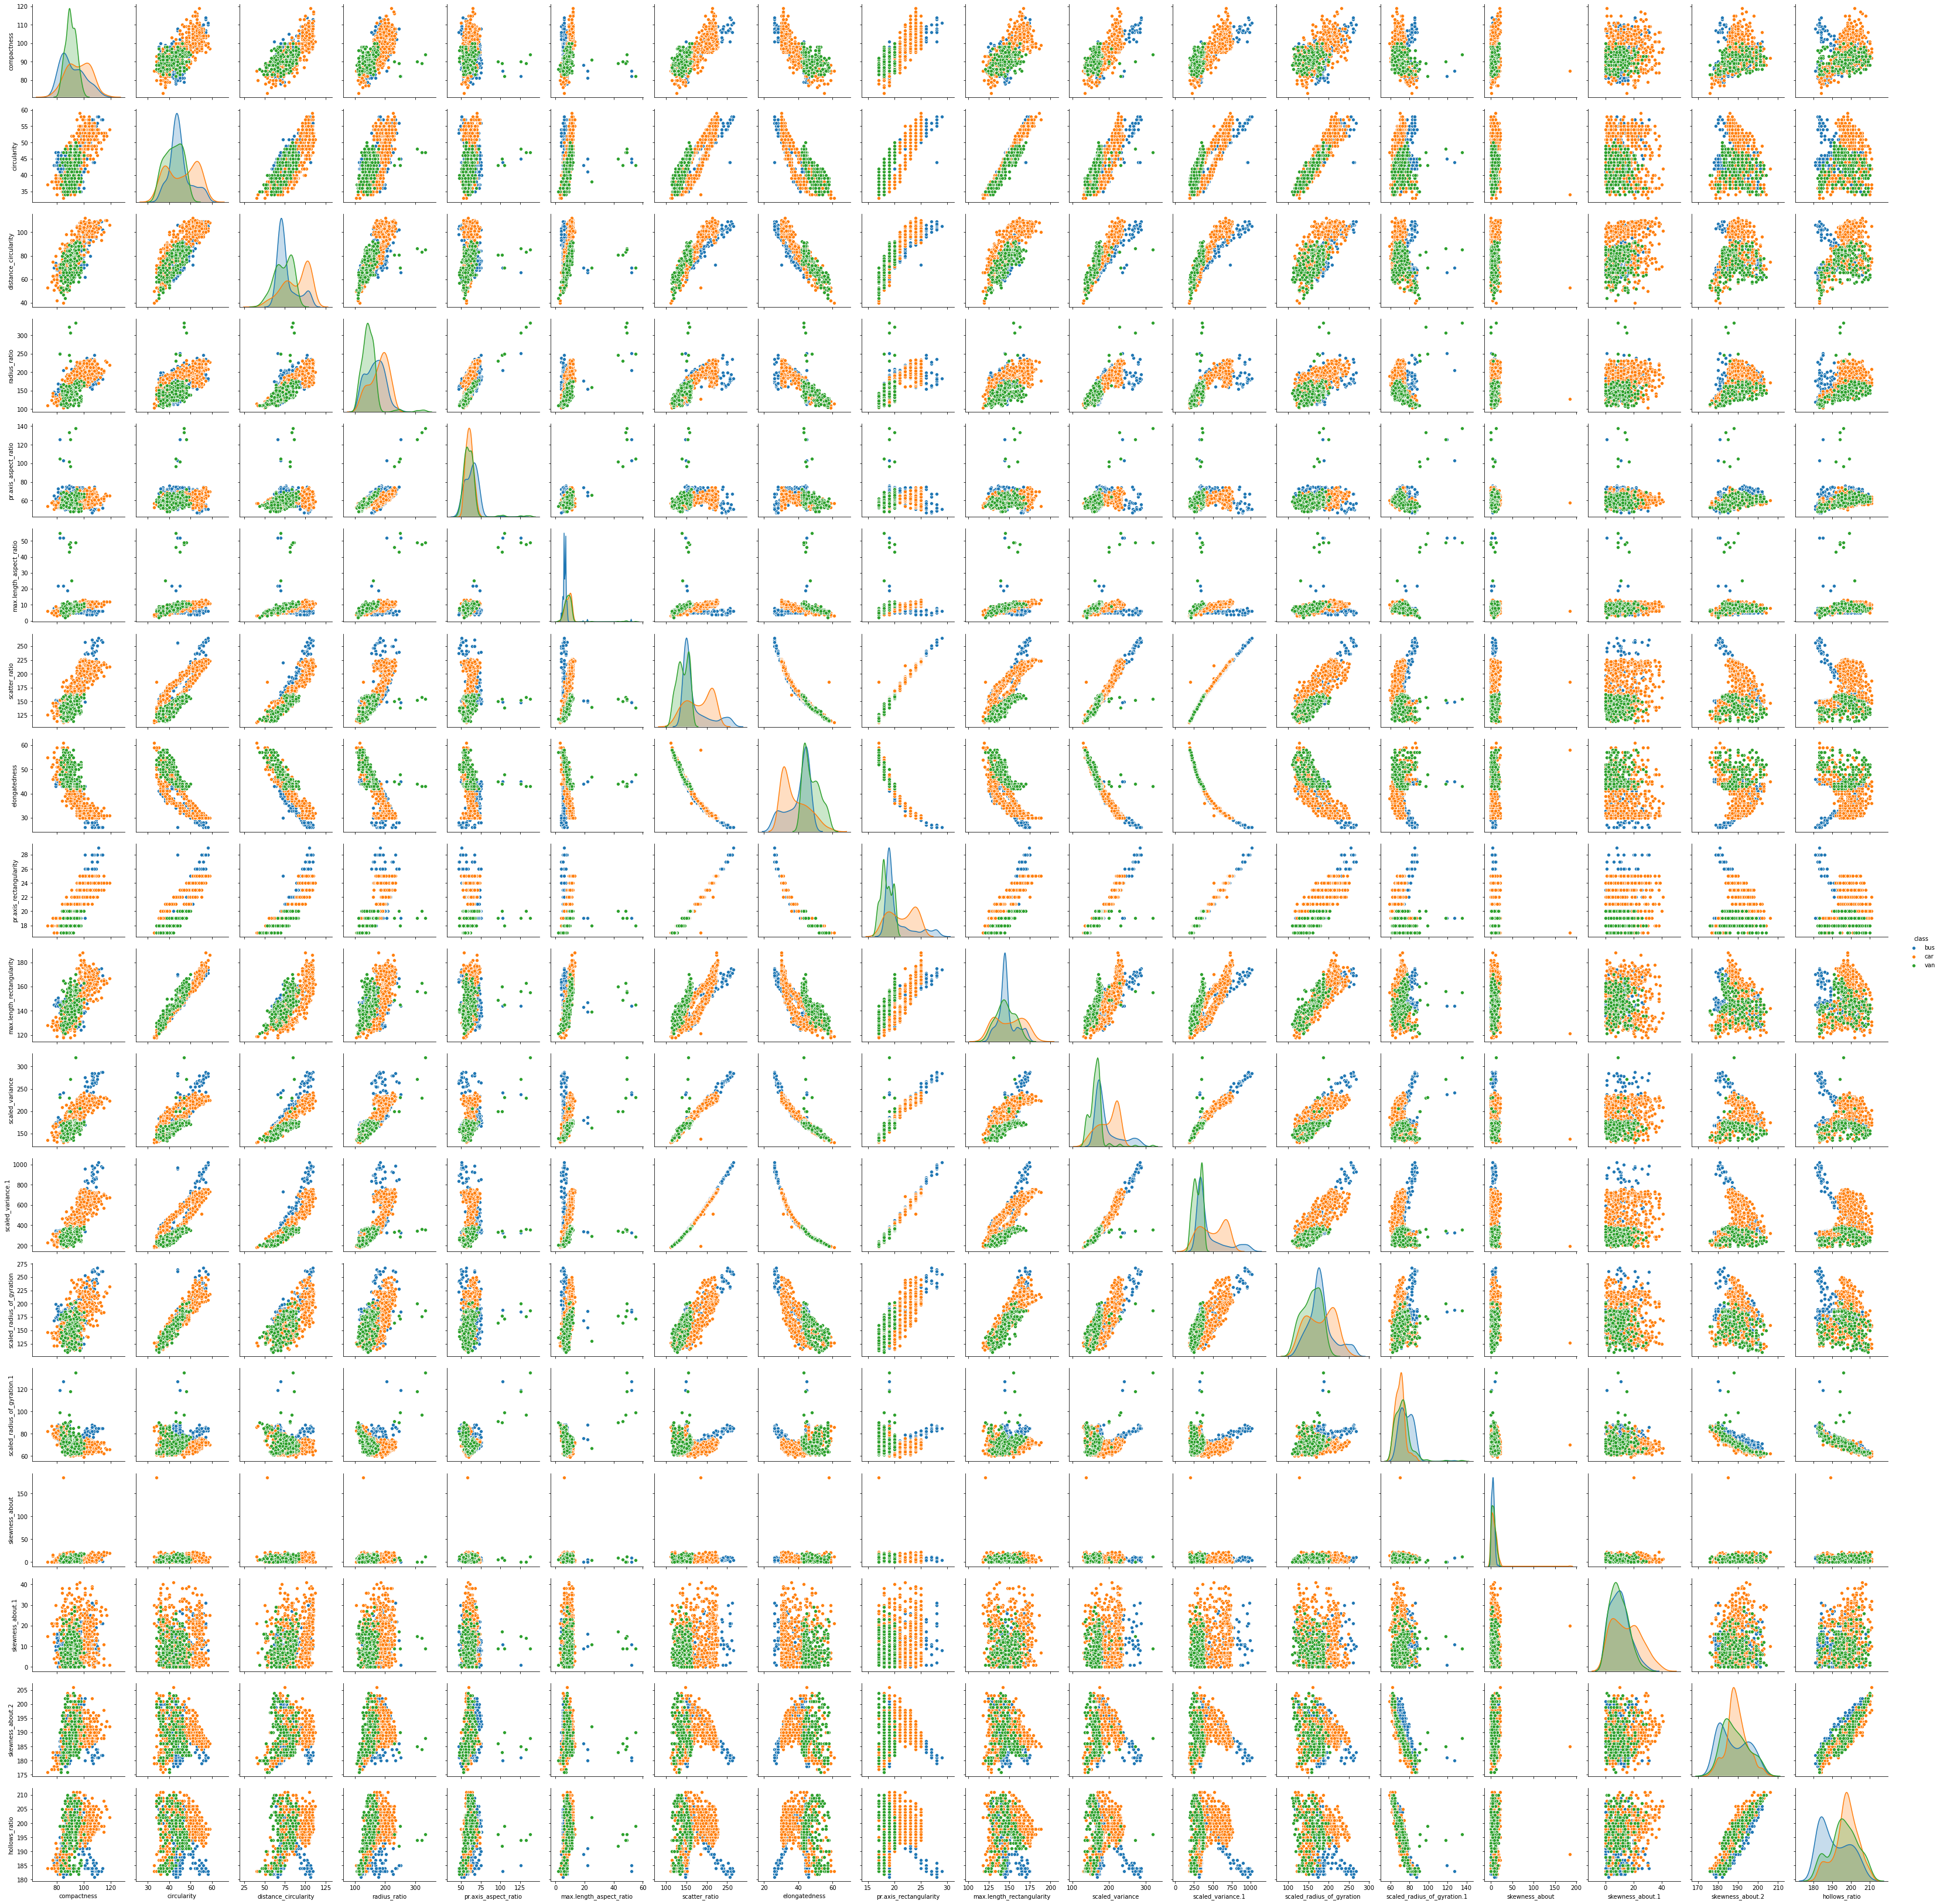

In [320]:
sns.pairplot(inpdf,diag_kind='kde',hue='class')

### Observations:

Compactness appears to have atleast two clusters for bus and car. Near normal curve for van.

circularity and distance_circulatity appear to have multiple peaks for car and van

circulatiy and max.length_rectangularity have a linear relationship

skweness_about seems to consistent across all classes with visible outliers

scatter_ratio to skewness_about indicates that scatter_ratio is clearly clustered across classes while the skewness values remains defined.

Clear clusters are visible for classes in plots for pr.axis_rectangularity vs scaled_radius_of_gyration,
pr.axis_rectangularity vs scaled_variance1.

Scaled_variance1 has a linear relationship with scatter_ratio, elongateness, pr_axis_rectangularity, scaled_variance.


In [321]:
inpdf.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.687098              0.788996   
circularity                     0.687098     1.000000              0.793404   
distance_circularity            0.788996     0.793404              1.000000   
radius_ratio                    0.687115     0.623320              0.767808   
pr.axis_aspect_ratio            0.087366     0.153310              0.156127   
max.length_aspect_ratio         0.147563     0.252024              0.264152   
scatter_ratio                   0.811018     0.847655              0.902426   
elongatedness                  -0.787287    -0.821474             -0.911073   
pr.axis_rectangularity          0.812761     0.845991              0.892827   
max.length_rectangularity       0.676112     0.962764              0.773725   
scaled_variance                 0.764265     0.797158              0.862823   
scaled_variance.1               0.816689     0.840209              0.887312   
scaled_radius_of_gyration       0.585649     0.926905              0.705266   
scaled_radius_of_gyration.1    -0.246589     0.053878             -0.224795   
skewness_about                  0.117953     0.042311              0.019758   
skewness_about.1                0.159062    -0.010518              0.266699   
skewness_about.2                0.292684    -0.108861              0.143216   
hollows_ratio                   0.359731     0.044365              0.331067   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.687115              0.087366   
circularity                      0.623320              0.153310   
distance_circularity             0.767808              0.156127   
radius_ratio                     1.000000              0.662048   
pr.axis_aspect_ratio             0.662048              1.000000   
max.length_aspect_ratio          0.450335              0.648741   
scatter_ratio                    0.733773              0.101011   
elongatedness                   -0.790148             -0.181075   
pr.axis_rectangularity           0.708714              0.076269   
max.length_rectangularity        0.569676              0.125824   
scaled_variance                  0.794869              0.271667   
scaled_variance.1                0.721152              0.087076   
scaled_radius_of_gyration        0.538308              0.121794   
scaled_radius_of_gyration.1     -0.175295              0.159002   
skewness_about                  -0.003783             -0.050024   
skewness_about.1                 0.175562             -0.033623   
skewness_about.2                 0.376281              0.235868   
hollows_ratio                    0.465489              0.263339   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.147563       0.811018   
circularity                                 0.252024       0.847655   
distance_circularity                        0.264152       0.902426   
radius_ratio                                0.450335       0.733773   
pr.axis_aspect_ratio                        0.648741       0.101011   
max.length_aspect_ratio                     1.000000       0.165117   
scatter_ratio                               0.165117       1.000000   
elongatedness                              -0.179566      -0.968899   
pr.axis_rectangularity                      0.161050       0.989538   
max.length_rectangularity                   0.306108       0.806754   
scaled_variance                             0.319475       0.948499   
scaled_variance.1                           0.143452       0.993650   
scaled_radius_of_gyration                   0.190036       0.798383   
scaled_radius_of_gyration.1                 0.299472      -0.024975   
skewness_about                             -0.005883       0.058382   
skewness_about.1                            0.041913       0.214744   
skewness_about.2                           -0.

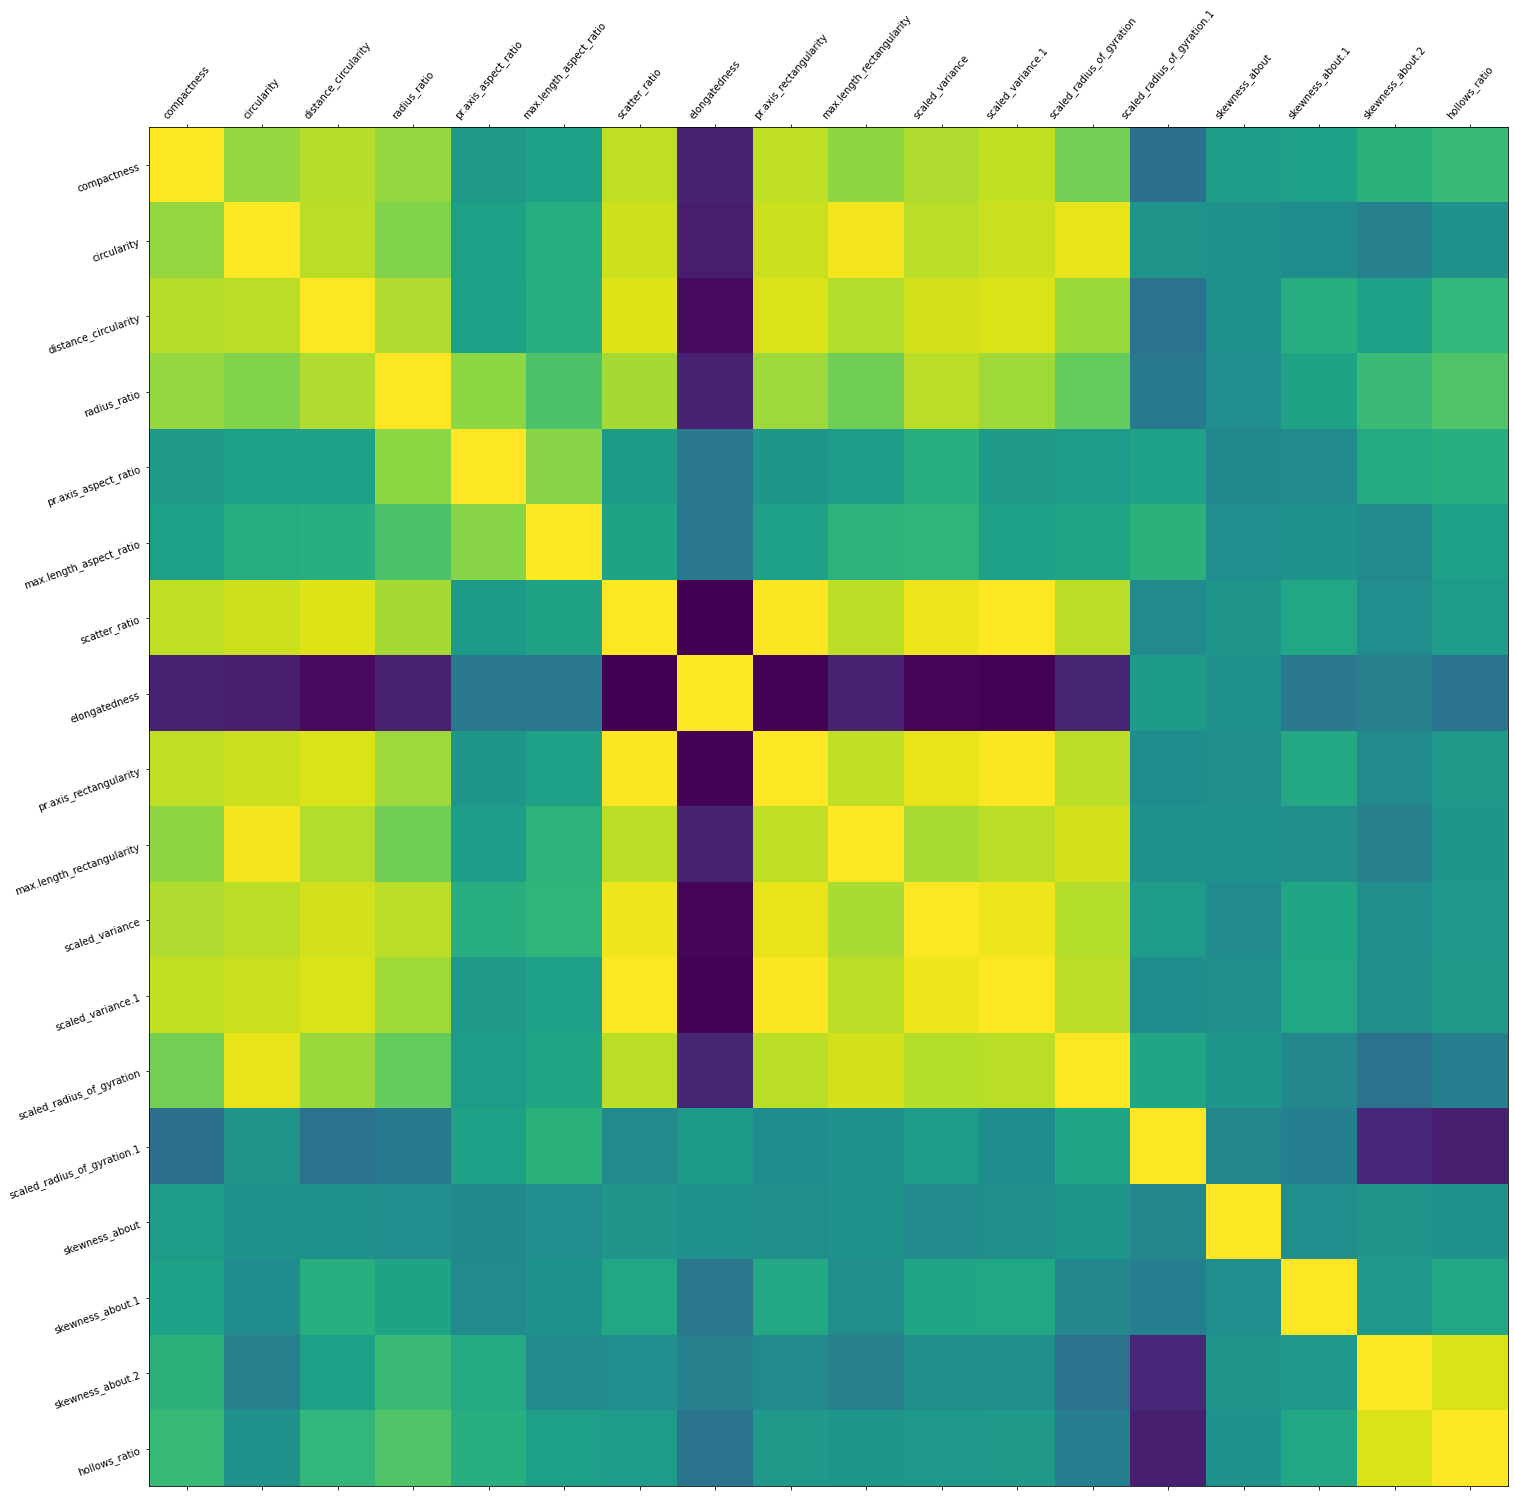

In [322]:
# Let's view  the correlation represented graphically
def plot_corr(ldf, size=25):
    corr = ldf.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.yticks(rotation = 20)
    plt.xticks(rotation = 50) 
plot_corr(inpdf)

### Observations:
pr.axis_rectangularity and scatter_ratio are highly correlated
Scatter_ratio is als highly correlated with scaled_variance, scaled_variance.1 scaled_radius_of_gyration
circularity has a high correlation with scatter_ratio, max_length_rectangularity, scaled_radius_of_gyration
pr.axis_rectangularity is highly correlated with distance_circularity, scatter_ratio, scaled_variance, scaled_variance.1

Overall there are a lot of features that have a correlation in the range of +/-0.75  with other.


## Splitting data into training and testing set

In [323]:
from scipy.stats import zscore
X = inpdf.drop('class',axis=1)
XScaled=X.apply(zscore)
#XScaled.head()
Y = inpdf['class']

x_train, x_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
40      0.158403     0.516183              1.389506      1.347772   
90      1.254033     1.654650              1.579886      1.587738   
493     1.010560     1.492012              1.008747      0.237930   
710     1.010560     1.492012              1.008747      0.957828   
69      0.523613     0.678821              0.120309      1.497751   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
40               0.670811                 0.092141       1.085772   
90               0.797522                 0.525743       1.477093   
493             -0.723004                 0.308942       1.507195   
710             -0.089452                -0.558263       1.687804   
69               1.557785                -0.341462       0.634248   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
40       -1.141930                 0.93397                   0.207704   
90       -1.269860                 1.31987                   1.721258   
493      -1.269860                 1.70577                   1.583662   
710      -1.525721                 1.70577                   1.170874   
69       -0.886070                 0.54807                   0.414098   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
40          1.218766           1.066038                   0.839130   
90          1.377839           1.490805                   1.667234   
493         0.964249           1.507795                   1.483211   
710         1.823244           1.847609                   1.728575   
69          0.614288           0.669588                   1.053824   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
40                      0.215135       -0.199620         -0.405684   
90                     -0.187046       -0.453490         -0.293808   
493                    -0.052986       -0.199620          0.489325   
710                     0.885438        0.308119          0.153697   
69                      0.215135       -0.326555         -0.629437   

     skewness_about.2  hollows_ratio  
40          -0.482590      -0.362282  
90          -0.156200       0.447430  
493         -0.482590       0.042574  
710         -0.156200      -1.171993  
69           0.986161      -0.092378

## SVM - training the model and verifying the accuracy on test set

In [324]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(x_train, y_train)

y_predict = svc_model.predict(x_test)
svc_orig_score_train=svc_model.score(x_train, y_train)
print(svc_orig_score_train)
svc_orig_score_test=svc_model.score(x_test, y_test)
print(svc_orig_score_test)
print(classification_report(yr_test,yr_predict))

0.935374149659864
0.9126984126984127
              precision    recall  f1-score   support

         bus       0.77      0.84      0.80        55
         car       0.93      0.85      0.89       130
         van       0.85      0.93      0.89        67

    accuracy                           0.87       252
   macro avg       0.85      0.87      0.86       252
weighted avg       0.87      0.87      0.87       252



In [325]:
svc_orig_cm=metrics.confusion_matrix(y_predict,y_test)
print("Confusion Matrix:\n",svc_orig_cm)

Confusion Matrix:
 [[ 49   9   1]
 [  4 117   2]
 [  2   4  64]]


## PCA

In [326]:
pca = PCA(n_components=18)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [327]:
#Eigen values
print(pca.explained_variance_)

[9.39318705e+00 3.00885632e+00 1.90406631e+00 1.10183137e+00
 9.87541698e-01 5.54769860e-01 3.62265758e-01 2.35237393e-01
 1.59518609e-01 9.72606651e-02 6.58228178e-02 4.51678027e-02
 3.53074315e-02 2.52689797e-02 2.02202198e-02 1.60112779e-02
 7.45949141e-03 1.66106602e-03]


In [328]:
#Eigen vectors
print(pca.components_)

[[ 2.74651878e-01  2.93850319e-01  3.04589831e-01  2.67876676e-01
   7.99786464e-02  9.73461257e-02  3.17110867e-01 -3.14340069e-01
   3.14567301e-01  2.82947630e-01  3.10325153e-01  3.14869533e-01
   2.72313210e-01 -1.88058595e-02  1.04720329e-02  5.89524851e-02
   2.73698326e-02  7.17275504e-02]
 [-1.26388204e-01  1.24137958e-01 -7.63026805e-02 -1.90701045e-01
  -1.21077404e-01  1.12424467e-02  4.51265828e-02  1.55760718e-02
   5.87294268e-02  1.15053494e-01  5.99651788e-02  5.09311099e-02
   2.08352537e-01  4.89300374e-01 -3.17023931e-02 -1.26769313e-01
  -5.41544953e-01 -5.41584087e-01]
 [-1.18056017e-01 -2.13455831e-02 -5.74695456e-02  2.72720501e-01
   6.42005101e-01  5.93480868e-01 -1.03949950e-01  6.05608215e-02
  -1.13089769e-01 -1.32253787e-02  5.24029441e-02 -1.12462907e-01
  -2.67906779e-02  2.88070067e-01 -8.77096296e-02 -8.67164197e-02
   1.13628285e-02  4.07739154e-02]
 [ 6.57252022e-02  1.99872151e-01 -7.60288341e-02 -3.01426224e-02
   3.21984155e-02 -2.28733698e-02 -6.

In [329]:
#percentage of variation explained by each eigen Vector
print(pca.explained_variance_ratio_)

[5.21222483e-01 1.66959686e-01 1.05655531e-01 6.11399813e-02
 5.47981141e-02 3.07838567e-02 2.01019161e-02 1.30531860e-02
 8.85159476e-03 5.39693770e-03 3.65246985e-03 2.50633508e-03
 1.95918882e-03 1.40216098e-03 1.12200823e-03 8.88456490e-04
 4.13922837e-04 9.21715869e-05]


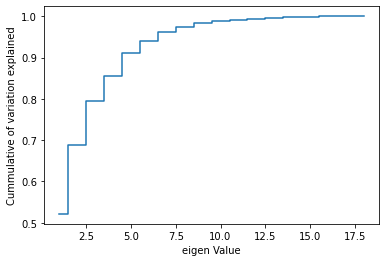

In [330]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cummulative of variation explained')
plt.xlabel('eigen Value')
plt.show()

### Observation: The plot indicates that a model could be trained with dimensions reduced to 7-9 attributes. First 9 PCs define >95% of the variance. 

In [331]:
#Dimensionality reduction

pca9 = PCA(n_components=9)
pca9.fit(XScaled)
print(pca9.components_)
print(pca9.explained_variance_ratio_)
Xpca9 = pca9.transform(XScaled)

[[ 2.74651878e-01  2.93850319e-01  3.04589831e-01  2.67876676e-01
   7.99786464e-02  9.73461257e-02  3.17110867e-01 -3.14340069e-01
   3.14567301e-01  2.82947630e-01  3.10325153e-01  3.14869533e-01
   2.72313210e-01 -1.88058595e-02  1.04720329e-02  5.89524851e-02
   2.73698326e-02  7.17275504e-02]
 [-1.26388204e-01  1.24137958e-01 -7.63026805e-02 -1.90701045e-01
  -1.21077404e-01  1.12424467e-02  4.51265828e-02  1.55760718e-02
   5.87294268e-02  1.15053494e-01  5.99651788e-02  5.09311099e-02
   2.08352537e-01  4.89300374e-01 -3.17023931e-02 -1.26769313e-01
  -5.41544953e-01 -5.41584087e-01]
 [-1.18056017e-01 -2.13455831e-02 -5.74695456e-02  2.72720501e-01
   6.42005101e-01  5.93480868e-01 -1.03949950e-01  6.05608215e-02
  -1.13089769e-01 -1.32253787e-02  5.24029441e-02 -1.12462907e-01
  -2.67906779e-02  2.88070067e-01 -8.77096296e-02 -8.67164197e-02
   1.13628285e-02  4.07739154e-02]
 [ 6.57252022e-02  1.99872151e-01 -7.60288341e-02 -3.01426224e-02
   3.21984155e-02 -2.28733698e-02 -6.

In [332]:
Xpca9

array([[ 0.32947236, -0.2067958 ,  1.00073192, ..., -0.90873592,
        -0.39043523, -0.86479098],
       [-1.61720165, -0.38024867, -0.33005771, ...,  0.38505126,
         0.20499928,  0.13880802],
       [ 3.70813065,  0.24188035,  0.17453709, ...,  0.04357018,
         0.29321392, -0.31634648],
       ...,
       [ 4.82429121, -0.04043465,  0.48257919, ...,  0.49288613,
         0.27984861, -0.64469065],
       [-3.25431421, -1.02535933, -0.4475279 , ..., -0.25790706,
         0.35384784, -0.20458676],
       [-4.72737117,  0.34081691, -0.62741808, ...,  0.0316408 ,
        -0.19656896, -0.42999538]])

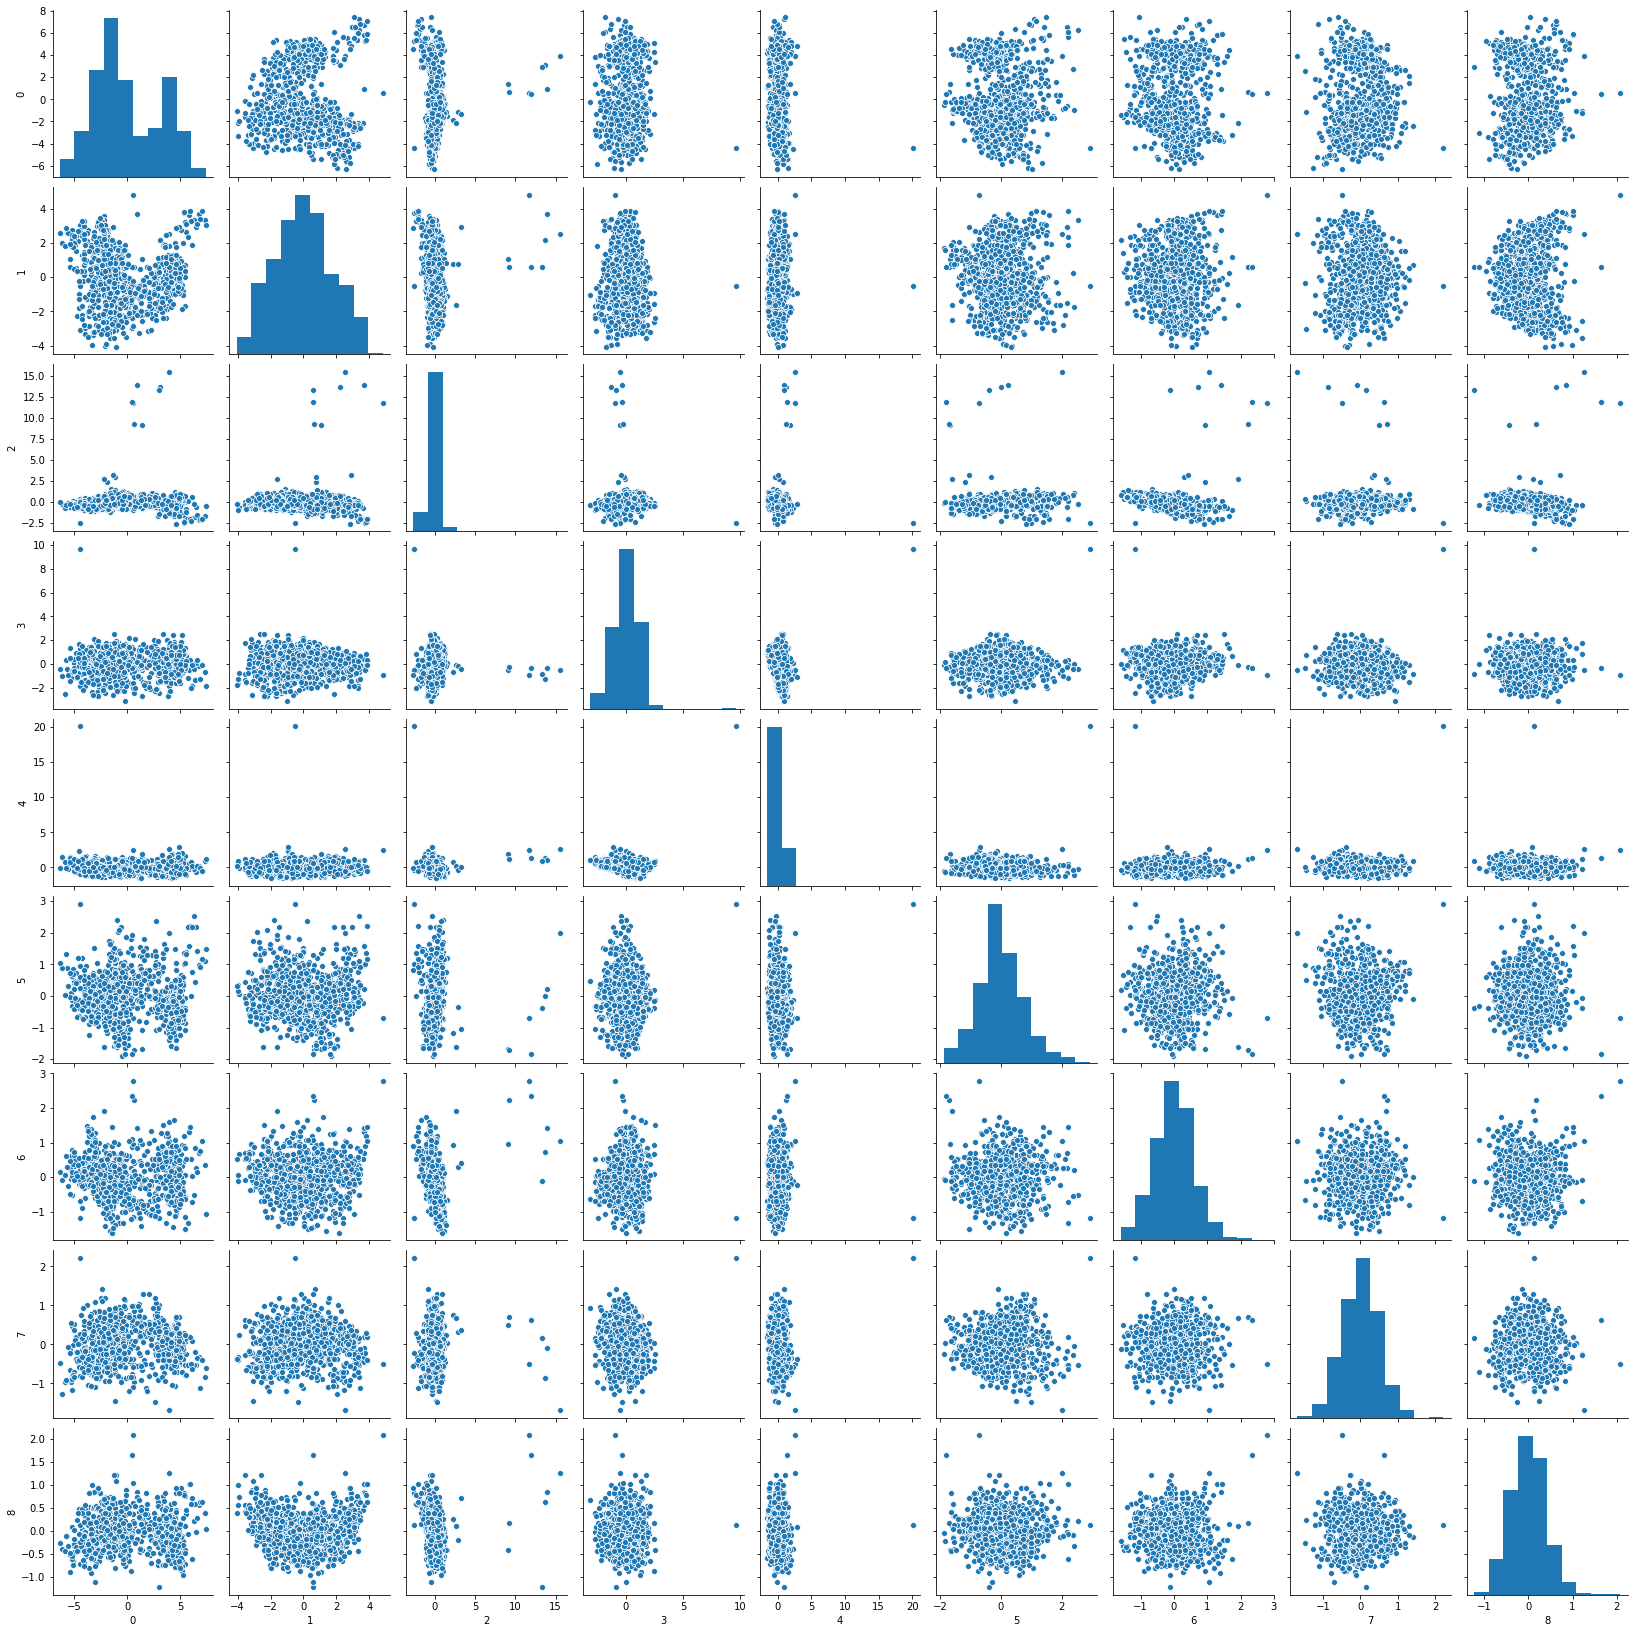

In [333]:
sns.pairplot(pd.DataFrame(Xpca9))

In [334]:
xr_train, xr_test, yr_train, yr_test = train_test_split(Xpca9, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
40      0.158403     0.516183              1.389506      1.347772   
90      1.254033     1.654650              1.579886      1.587738   
493     1.010560     1.492012              1.008747      0.237930   
710     1.010560     1.492012              1.008747      0.957828   
69      0.523613     0.678821              0.120309      1.497751   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
40               0.670811                 0.092141       1.085772   
90               0.797522                 0.525743       1.477093   
493             -0.723004                 0.308942       1.507195   
710             -0.089452                -0.558263       1.687804   
69               1.557785                -0.341462       0.634248   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
40       -1.141930                 0.93397                   0.207704   
90       -1.269860                 1.31987                   1.721258   
493      -1.269860                 1.70577                   1.583662   
710      -1.525721                 1.70577                   1.170874   
69       -0.886070                 0.54807                   0.414098   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
40          1.218766           1.066038                   0.839130   
90          1.377839           1.490805                   1.667234   
493         0.964249           1.507795                   1.483211   
710         1.823244           1.847609                   1.728575   
69          0.614288           0.669588                   1.053824   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
40                      0.215135       -0.199620         -0.405684   
90                     -0.187046       -0.453490         -0.293808   
493                    -0.052986       -0.199620          0.489325   
710                     0.885438        0.308119          0.153697   
69                      0.215135       -0.326555         -0.629437   

     skewness_about.2  hollows_ratio  
40          -0.482590      -0.362282  
90          -0.156200       0.447430  
493         -0.482590       0.042574  
710         -0.156200      -1.171993  
69           0.986161      -0.092378

In [335]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(xr_train, yr_train)
yr_predict = svc_model.predict(xr_test)

print("Accuracy:",metrics.accuracy_score(yr_predict,yr_test))
print('Model Score with 9 features after PCA and Dimensionality Reduction')
print(svc_model.score(xr_train, yr_train))
print(svc_model.score(xr_test, yr_test))

print('Model score originally with all 18 features')
print(svc_orig_score_train)
print(svc_orig_score_test)

Accuracy: 0.8690476190476191
Model Score with 9 features after PCA and Dimensionality Reduction
0.9081632653061225
0.8690476190476191
Model score originally with all 18 features
0.935374149659864
0.9126984126984127


In [336]:
print('Confusion Matrix with 9 features')
print(yr_test)
print("Confusion Matrix:\n",metrics.confusion_matrix(yr_predict,yr_test))

print('Confusion Matrix with original data')
print(svc_orig_cm)

Confusion Matrix with 9 features
486    car
113    car
243    car
603    car
807    car
      ... 
705    car
779    van
251    car
709    car
352    van
Name: class, Length: 252, dtype: category
Categories (3, object): [bus, car, van]
Confusion Matrix:
 [[ 46  12   2]
 [  5 111   3]
 [  4   7  62]]
Confusion Matrix with original data
[[ 49   9   1]
 [  4 117   2]
 [  2   4  64]]


###
The accuracy score after PCA and DR has reduced as can be observed from the accuracy and confusion matrix.
However, considering that the number of features have been reduced by 50%, the performance benefit shall be significant on production.
The model is expected to perform better on an out of sample test data set.